In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
train_data =pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_data=train_data.set_index(train_data["PassengerId"])

In [6]:
train_data = train_data.drop("PassengerId",axis=1)

In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Exploring Data
# 

In [8]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
#train_data = train_data.drop("Name",axis = 1)

In [12]:
#train_data = train_data.drop("Cabin",axis = 1)

In [13]:
missing_age =train_data[train_data["Age"].isna()]

In [14]:
missing_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [15]:
 compare_Age=train_data[(train_data["SibSp"]==0) & (train_data["Parch"]==0 ) & (train_data["Age"].notna() )]

In [16]:
compare_Age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

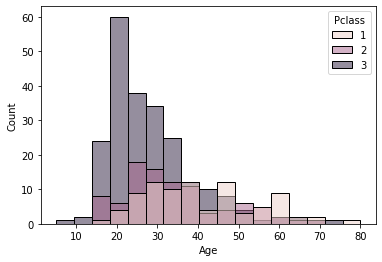

In [17]:
sns.histplot(data = compare_Age , x = compare_Age["Age"],hue="Pclass")

In [18]:
 zero_sib=train_data[(train_data["SibSp"]==0) & (train_data["Age"].notna() )]

In [19]:
 zero_sib_not_par=train_data[(train_data["SibSp"]==0) & (train_data["Parch"]!=0 ) & (train_data["Age"].notna() )]

In [20]:
zero_par =train_data[(train_data["Parch"]==0 ) & (train_data["Age"].notna() )]

In [21]:
zero_par_not_sib =train_data[(train_data["SibSp"]!=0) & (train_data["Parch"]==0 ) & (train_data["Age"].notna() )]

<AxesSubplot:xlabel='Age', ylabel='Count'>

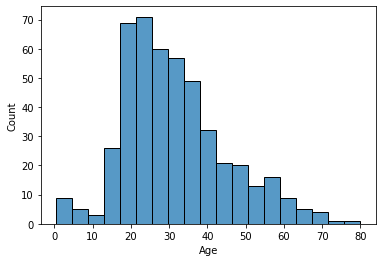

In [22]:
sns.histplot(data = zero_sib , x = zero_sib["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

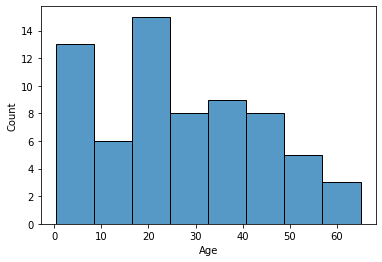

In [23]:
sns.histplot(data = zero_sib_not_par , x = zero_sib_not_par["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

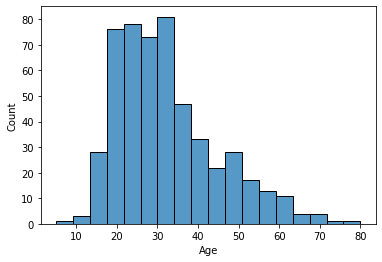

In [24]:
sns.histplot(data = zero_par , x = zero_par["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

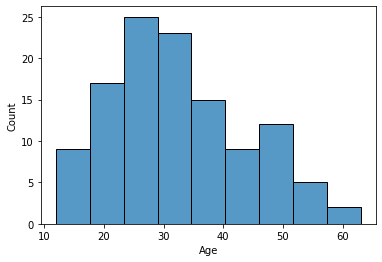

In [25]:
sns.histplot(data = zero_par_not_sib , x = zero_par_not_sib["Age"])

In [26]:
mrOrMrs =train_data[((train_data["Name"].str.contains("Mr"))|(train_data["Name"].str.contains("Ms"))) & (train_data["Age"].notna())]

In [27]:
mrOrMrs

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


<AxesSubplot:xlabel='Age', ylabel='Count'>

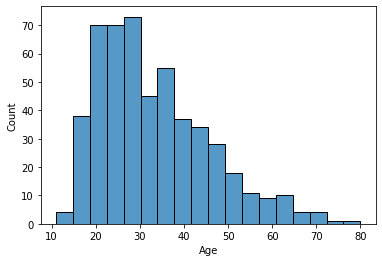

In [28]:
sns.histplot(data = mrOrMrs , x = mrOrMrs["Age"])

In [29]:
mrOrMrs["Age"].min()

11.0

In [30]:
mrOrMrs["Age"].max()

80.0

In [31]:
mrOrMrs["Age"].mean()

33.1083984375

In [32]:
mrOrMrs_nonAge =train_data[((train_data["Name"].str.contains("Mr"))|(train_data["Name"].str.contains("Ms"))) & (train_data["Age"].isna())]

In [33]:
mrOrMrs_nonAge

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C


In [34]:
mrOrMrs[mrOrMrs["Age"]<15]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C


In [35]:
train_data[train_data["Age"]<10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


In [36]:
_3_class_lonly = compare_Age[compare_Age["Pclass"]==3]

<AxesSubplot:xlabel='Age', ylabel='Count'>

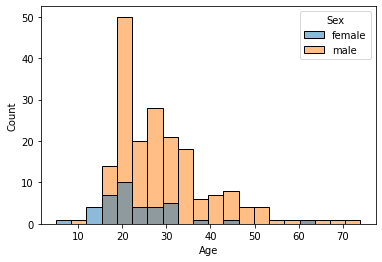

In [37]:
sns.histplot(data = _3_class_lonly , x = _3_class_lonly["Age"],hue="Sex")

In [38]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [39]:
_3_class_lonly["Age"].mean()

28.235555555555557

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [41]:
ids =train_data[(train_data["SibSp"]==0) &(train_data["Parch"]==0) & (train_data["Pclass"]==3) & (train_data["Age"].isna())].index

In [42]:
ids.sort_values()

Int64Index([  6,  20,  27,  29,  30,  33,  37,  43,  46,  48,  77,  78,  83,
             88,  96, 102, 108, 122, 127, 155, 159, 197, 199, 224, 236, 251,
            261, 265, 275, 301, 305, 336, 355, 359, 360, 368, 369, 385, 389,
            411, 412, 416, 421, 426, 429, 445, 455, 460, 465, 469, 471, 496,
            498, 503, 512, 518, 523, 525, 532, 539, 553, 561, 564, 565, 569,
            574, 585, 590, 599, 602, 612, 614, 630, 644, 649, 651, 654, 657,
            668, 681, 693, 698, 719, 728, 739, 740, 761, 774, 777, 779, 791,
            826, 827, 829, 833, 838, 860, 869, 879],
           dtype='int64', name='PassengerId')

In [43]:
train_data["Age"].loc[ids]=train_data.loc[ids]["Age"].replace(np.nan,28)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
train_data.loc[ids]["Age"] 

PassengerId
6      28.0
20     28.0
27     28.0
29     28.0
30     28.0
       ... 
833    28.0
838    28.0
860    28.0
869    28.0
879    28.0
Name: Age, Length: 99, dtype: float64

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       813 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [46]:
_2_class_lonly = compare_Age[compare_Age["Pclass"]==2]

<AxesSubplot:xlabel='Age', ylabel='Count'>

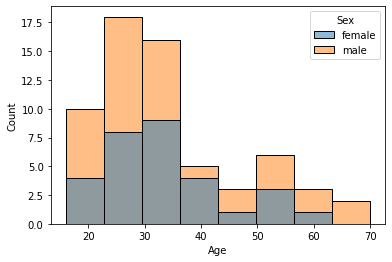

In [47]:
sns.histplot(data = _2_class_lonly , x = _2_class_lonly["Age"],hue="Sex")

In [48]:
_2_class_lonly.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived     0.344086
Pclass       2.000000
Age         33.736559
SibSp        0.000000
Parch        0.000000
Fare        14.791532
dtype: float64

In [49]:
ids2 =train_data[(train_data["SibSp"]==0) &(train_data["Parch"]==0) & (train_data["Pclass"]==2) & (train_data["Age"].isna())].index

In [50]:
ids2

Int64Index([18, 182, 278, 304, 414, 467, 482, 548, 597, 675, 733], dtype='int64', name='PassengerId')

In [51]:
train_data["Age"].loc[ids].isna().unique()

array([False])

In [52]:
train_data["Age"].loc[ids2]=train_data.loc[ids2]["Age"].replace(np.nan,33.7)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       824 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [54]:
_1_class_lonly = compare_Age[compare_Age["Pclass"]==1]

<AxesSubplot:xlabel='Age', ylabel='Count'>

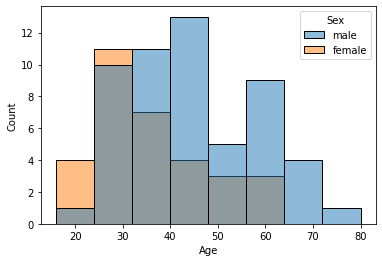

In [55]:
sns.histplot(data = _1_class_lonly , x = _1_class_lonly["Age"],hue="Sex")

In [56]:
_1_class_lonly.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived     0.593023
Pclass       1.000000
Age         41.005814
SibSp        0.000000
Parch        0.000000
Fare        66.675048
dtype: float64

In [57]:
ids3 =train_data[(train_data["SibSp"]==0) &(train_data["Parch"]==0) & (train_data["Pclass"]==1) & (train_data["Age"].isna())].index

In [58]:
ids3

Int64Index([ 56,  65, 169, 186, 257, 271, 285, 296, 299, 307, 352, 476, 508,
            528, 558, 603, 634, 712, 741, 767, 794, 816, 840],
           dtype='int64', name='PassengerId')

In [59]:
train_data["Age"].loc[ids3]=train_data.loc[ids3]["Age"].replace(np.nan,41)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       847 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [61]:
rest=train_data[train_data["Age"].isna()]

In [62]:
rest

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S


In [63]:
ids4 =train_data[(train_data["SibSp"]!=0) &(train_data["Parch"]==0)  & (train_data["Age"].isna())].index

In [64]:
train_data.loc[ids4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q


<AxesSubplot:xlabel='Age', ylabel='Count'>

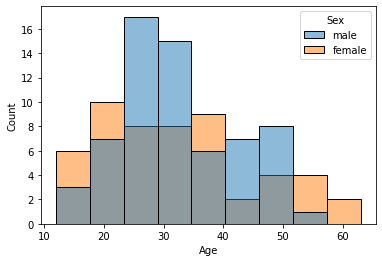

In [65]:
sns.histplot(data = zero_par_not_sib , x = zero_par_not_sib["Age"],hue="Sex")

In [66]:
zero_par_not_sib.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived     0.478632
Pclass       1.923077
Age         32.034188
SibSp        1.145299
Parch        0.000000
Fare        43.301926
dtype: float64

In [67]:
train_data["Age"].loc[ids4]=train_data.loc[ids4]["Age"].replace(np.nan,32)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
rest=train_data[train_data["Age"].isna()]

In [69]:
rest

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S


In [70]:
zero_sib_not_par.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived     0.671642
Pclass       1.955224
Age         26.436567
SibSp        0.000000
Parch        1.582090
Fare        61.389181
dtype: float64

In [71]:
ids5 =train_data[(train_data["SibSp"]==0) &(train_data["Parch"]!=0)  & (train_data["Age"].isna())].index

In [72]:
train_data["Age"].loc[ids5]=train_data.loc[ids5]["Age"].replace(np.nan,26)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [73]:
rest=train_data[train_data["Age"].isna()]

In [74]:
rest

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S


In [75]:
have_fam =train_data[(train_data["SibSp"]!=0) &(train_data["Parch"]!=0)  & (train_data["Age"].notna())]

In [76]:
have_fam

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

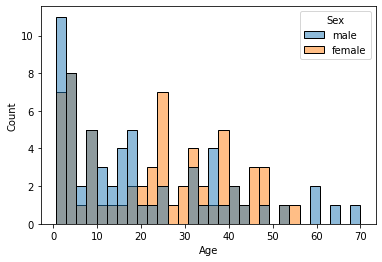

In [77]:
sns.histplot(data = have_fam , x = have_fam["Age"],hue="Sex",bins=30)

In [78]:
have_fam.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Survived     0.468254
Pclass       2.333333
Age         21.181905
SibSp        1.841270
Parch        1.603175
Fare        51.144610
dtype: float64

In [79]:
ids6 =train_data[(train_data["SibSp"]!=0) &(train_data["Parch"]!=0)  & (train_data["Age"].isna())].index

In [80]:
train_data["Age"].loc[ids6]=train_data.loc[ids6]["Age"].replace(np.nan,5)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [82]:
train_data =train_data.drop("Cabin",axis=1)

In [83]:
train_data[train_data["Embarked"].isna()].index

Int64Index([62, 830], dtype='int64', name='PassengerId')

In [84]:
train_data=train_data.drop(index = [62,830],axis=0)

In [85]:
train_data =train_data.drop("Name",axis=1)

In [86]:
train_data =train_data.drop("Ticket",axis=1)

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [88]:
#train_data["Embarked"].unique()

In [89]:
train_data=pd.get_dummies(train_data,columns=["Embarked","Sex"],drop_first=True)

# models


In [90]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [91]:
X = train_data.drop("Survived",axis=1)

In [92]:
y= train_data["Survived"]

<AxesSubplot:xlabel='Survived', ylabel='count'>

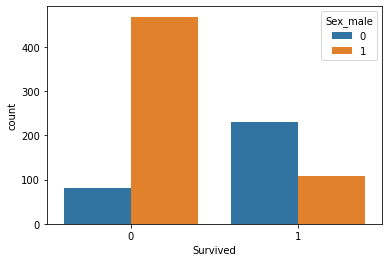

In [93]:
sns.countplot(data = train_data ,x=train_data["Survived"],hue = train_data["Sex_male"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

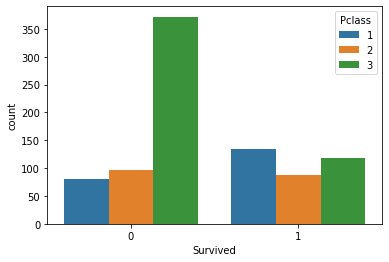

In [94]:
sns.countplot(data = train_data ,x=train_data["Survived"],hue = train_data["Pclass"])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

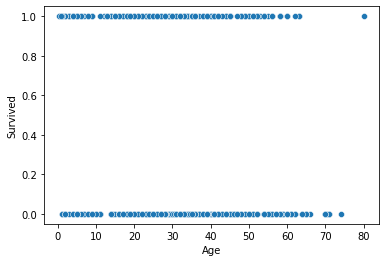

In [95]:
sns.scatterplot(data=train_data,y =train_data["Survived"],x="Age")

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# scale data

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler  = StandardScaler()

In [100]:
X_train_scaled =scaler.fit_transform(X_train)

In [101]:
X_test_scaled =scaler.transform(X_test) 

# method to quick check best model allgorithm

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [103]:
def run_model(model):
    
    # Fit Model
    model.fit(X_train_scaled,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test_scaled)
    mbr = mean_absolute_error(y_test,preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'ME : {mbr}')
    print(f'RMSE : {rmse}')
    
  

# linear REG

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
LinearModel = LinearRegression()

In [106]:
run_model(LinearModel)

ME : 0.29333531815012476
RMSE : 0.37829112487450434


# Poly Reg

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
from sklearn.pipeline import make_pipeline

In [109]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [110]:
run_model(pipe)

ME : 0.29061112421728696
RMSE : 0.39599620136684494


# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
Knn_model = KNeighborsClassifier(n_neighbors=15)

In [113]:
run_model(Knn_model)

ME : 0.21722846441947566
RMSE : 0.4660777450377519


In [114]:
Knn_model.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# Decission Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
Dtree_model = DecisionTreeClassifier()

In [117]:
run_model(Dtree_model)

ME : 0.250936329588015
RMSE : 0.5009354545128694


In [118]:
Dtree_model.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

# SVM

In [119]:
from sklearn.svm import SVC

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
 param_grid  ={'C':[.01,.1,.5,1,2,5,10,15,20],'gamma':['scale', 'auto']}

In [122]:
svr = SVC()

In [123]:
grid = GridSearchCV(svr,param_grid)

In [124]:
run_model(grid)

ME : 0.20224719101123595
RMSE : 0.44971901339751685


In [125]:
grid.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# Random fores

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
random = RandomForestClassifier(n_estimators=25)

In [128]:
run_model(random)

ME : 0.2209737827715356
RMSE : 0.47007848575693784


In [129]:
random.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

# gradiant boost

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
Gr_model = GradientBoostingClassifier()

In [132]:
run_model(Gr_model)

ME : 0.17228464419475656
RMSE : 0.41507185425508747


# Adabosst

In [133]:
from sklearn.ensemble import AdaBoostClassifier

In [134]:
ada_model = AdaBoostClassifier()

In [135]:
run_model(ada_model)

ME : 0.19101123595505617
RMSE : 0.4370483222197017


# choose SVM

In [136]:
x_scaled = scaler.fit_transform(X)

In [137]:
grid.fit(x_scaled,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20],
                         'gamma': ['scale', 'auto']})

In [138]:
svc=SVC(C=0.5,gamma='auto',kernel='rbf')
#,'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [139]:
svc.fit(X_train_scaled,y_train)

SVC(C=0.5, gamma='auto')

In [140]:
svc.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [141]:
svc.fit(x_scaled,y)

SVC(C=0.5, gamma='auto')

In [142]:
#svc.predict(scaler.transform(test_data))

In [143]:
#svr.support_vectors_


In [144]:
#co =pd.DataFrame(co,index=X.columns)

In [145]:
#co

# clean test data

In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [147]:
#test_data = test_data.drop("Name",axis=1)

In [148]:
test_data = test_data.drop("Ticket",axis=1)

In [149]:
test_data = test_data.drop("Cabin",axis=1)

In [150]:
_3_lonly =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==3) & (test_data["Age"].notna())]

In [151]:
_3_lonly.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1084.336842
Pclass            3.000000
Age              26.121053
SibSp             0.000000
Parch             0.000000
Fare              8.603591
dtype: float64

In [152]:
idt1 =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==3) & (test_data["Age"].isna())].index

In [153]:
test_data["Age"].loc[idt1]=test_data.loc[idt1]["Age"].replace(np.nan,26)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [154]:
_2_lonly =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==2) & (test_data["Age"].notna())]

In [155]:
_2_lonly.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1126.000000
Pclass            2.000000
Age              29.336735
SibSp             0.000000
Parch             0.000000
Fare             17.773978
dtype: float64

In [156]:
idt2 =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==2) & (test_data["Age"].isna())].index

In [157]:
test_data["Age"].loc[idt2]=test_data.loc[idt2]["Age"].replace(np.nan,29.3)

In [158]:
_1_lonly =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==1) & (test_data["Age"].notna())]

In [159]:
_1_lonly.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1105.071429
Pclass            1.000000
Age              39.428571
SibSp             0.000000
Parch             0.000000
Fare             78.076488
dtype: float64

In [160]:
idt3 =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]==0) & (test_data["Pclass"]==1) & (test_data["Age"].isna())].index

In [161]:
test_data["Age"].loc[idt3]=test_data.loc[idt3]["Age"].replace(np.nan,39.4)

In [162]:
zer_parch =test_data[(test_data["SibSp"]!=0) &(test_data["Parch"]==0)  & (test_data["Age"].notna())]

In [163]:
zer_parch.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1086.278689
Pclass            1.786885
Age              36.270492
SibSp             1.147541
Parch             0.000000
Fare             50.673705
dtype: float64

In [164]:
idt4 =test_data[(test_data["SibSp"]!=0) &(test_data["Parch"]==0)  & (test_data["Age"].isna())].index

In [165]:
test_data["Age"].loc[idt4]=test_data.loc[idt4]["Age"].replace(np.nan,36.2)

In [166]:
zer_sib =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]!=0)  & (test_data["Age"].notna())]

In [167]:
zer_sib.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1109.142857
Pclass            2.000000
Age              29.220000
SibSp             0.000000
Parch             1.535714
Fare             54.503125
dtype: float64

In [168]:
idt5 =test_data[(test_data["SibSp"]==0) &(test_data["Parch"]!=0)  & (test_data["Age"].isna())].index

In [169]:
test_data["Age"].loc[idt5]=test_data.loc[idt5]["Age"].replace(np.nan,29.2)

In [170]:
family =test_data[(test_data["SibSp"]!=0) &(test_data["Parch"]!=0)  & (test_data["Age"].notna())]

In [171]:
family.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1110.578947
Pclass            2.140351
Age              25.348070
SibSp             1.578947
Parch             1.561404
Fare             69.982674
dtype: float64

In [172]:
idt6 =test_data[(test_data["SibSp"]!=0) &(test_data["Parch"]!=0)  & (test_data["Age"].isna())].index

In [173]:
test_data["Age"].loc[idt6]=test_data.loc[idt6]["Age"].replace(np.nan,25.3)

In [174]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [175]:
test_data[test_data["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [176]:
test_data.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    1100.500000
Pclass            2.265550
Age              29.969139
SibSp             0.447368
Parch             0.392344
Fare             35.627188
dtype: float64

In [177]:
test_data["Fare"].loc[152] = 35.6

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [178]:
test_data.loc[152]["Fare"]

35.6

In [179]:
test_data=test_data.set_index(test_data["PassengerId"])

In [180]:
test_data=test_data.drop("PassengerId",axis=1)

In [181]:
test_data=test_data.drop("Name",axis=1)

In [182]:
test_data=pd.get_dummies(test_data , columns=["Embarked","Sex"],drop_first=True)

In [183]:
X.columns == test_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [184]:
pred = svc.predict(scaler.transform(test_data))

In [185]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [186]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': pred})


In [187]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [188]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
